#📌 Extracción

In [12]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE_PATH = "/content/drive/MyDrive/telecomx1/TelecomX_Data.json"

raw = pd.read_json(FILE_PATH)

# Convertirlo normalizado a dataFrame
df = pd.json_normalize(raw.to_dict('records'), sep='.')

print("Dimensiones:", df.shape)

df.info()

Mounted at /content/drive
Dimensiones: (7267, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13

#🔧 Transformación

In [13]:
# Preparacion de los dataframe
df['customerID'] = df['customerID'].astype('string')
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

na_total = df['account.Charges.Total'].isna()
df.loc[na_total & (df['customer.tenure'] == 0), 'account.Charges.Total'] = 0
df.loc[na_total & (df['customer.tenure'] > 0),  'account.Charges.Total'] = \
    df.loc[na_total, 'account.Charges.Monthly'] * df.loc[na_total, 'customer.tenure']

df['Churn_bin'] = df['Churn'].astype(str).str.strip().str.lower().eq('yes').astype(int)
days_per_month = 365.25 / 12
df['Cuentas_Diarias'] = df['account.Charges.Monthly'].fillna(0) / days_per_month


cat_cols = [
    'Churn','customer.gender','customer.Partner','customer.Dependents',
    'phone.PhoneService','phone.MultipleLines','internet.InternetService',
    'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection',
    'internet.TechSupport','internet.StreamingTV','internet.StreamingMovies',
    'account.Contract','account.PaperlessBilling','account.PaymentMethod'
]
existing_cat = [c for c in cat_cols if c in df.columns]
df[existing_cat] = (df[existing_cat]
                    .astype('string')
                    .apply(lambda s: s.str.strip().str.lower())
                    .astype('category'))

# Revisa si hay datos no validos
print("\nNulos por columna (top 5):")
print(df.isna().sum().sort_values(ascending=False).head(5))
print("\nDuplicados por customerID:", df.duplicated('customerID').sum())


Nulos por columna (top 5):
customerID                0
Churn                     0
customer.gender           0
customer.SeniorCitizen    0
customer.Partner          0
dtype: int64

Duplicados por customerID: 0


#📊 Carga y análisis


Resumen(conteo y %):
           Clientes      %
Permanece      5398  74.28
Churn          1869  25.72


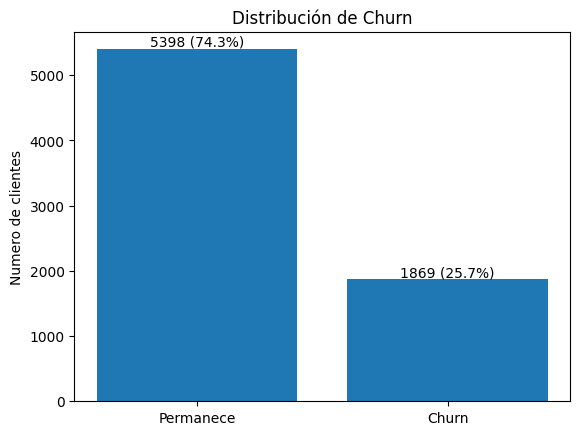

,% churn
account.Contract,
month-to-month,41.3
one year,10.9
two year,2.8


Churn_bin,Permanecen,Churn
account.Contract,,
month-to-month,58.7,41.3
one year,89.1,10.9
two year,97.2,2.8


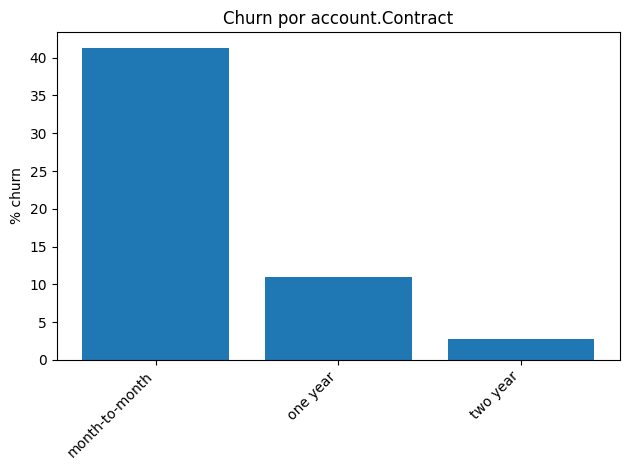

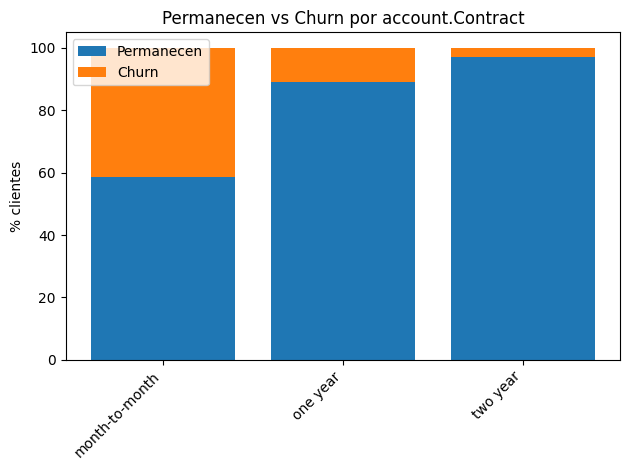

,% churn
account.PaymentMethod,
electronic check,43.8
mailed check,18.5
bank transfer (automatic),16.2
credit card (automatic),14.8


Churn_bin,Permanecen,Churn
account.PaymentMethod,,
bank transfer (automatic),83.8,16.2
credit card (automatic),85.2,14.8
electronic check,56.2,43.8
mailed check,81.5,18.5


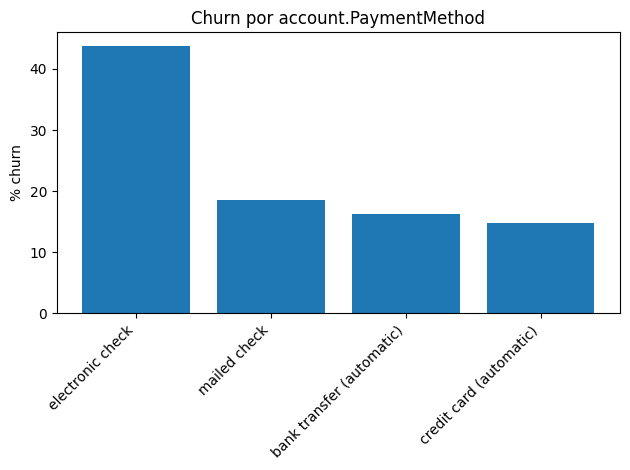

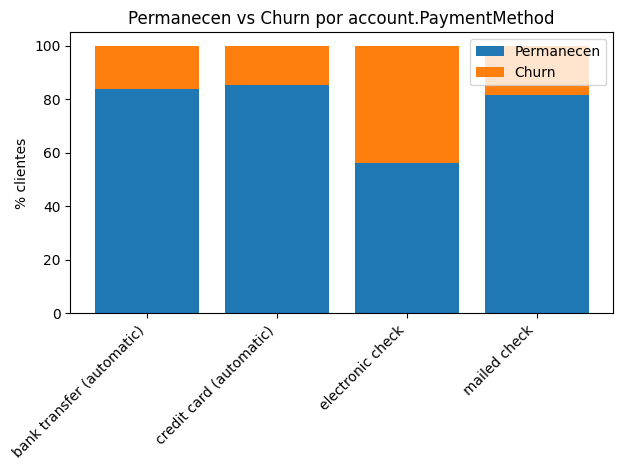

,% churn
account.PaperlessBilling,
yes,32.5
no,15.9


Churn_bin,Permanecen,Churn
account.PaperlessBilling,,
no,84.1,15.9
yes,67.5,32.5


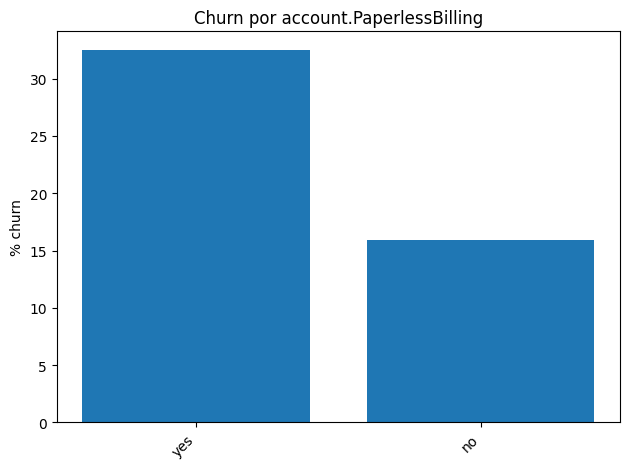

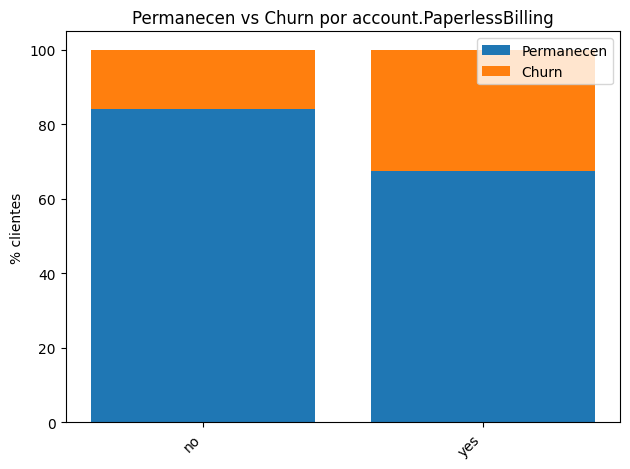

,% churn
internet.InternetService,
fiber optic,40.6
dsl,18.4
no,7.1


Churn_bin,Permanecen,Churn
internet.InternetService,,
dsl,81.6,18.4
fiber optic,59.4,40.6
no,92.9,7.1


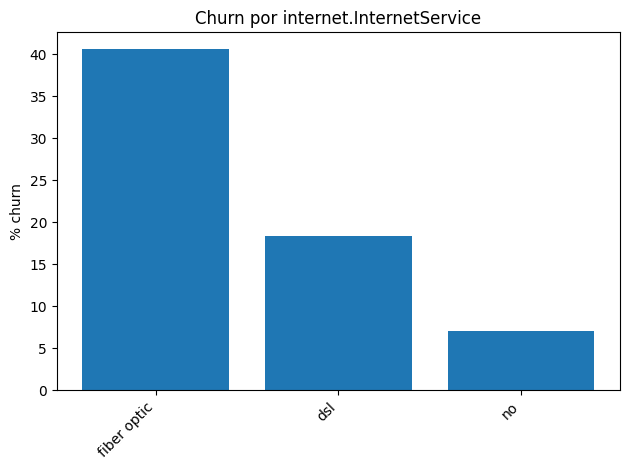

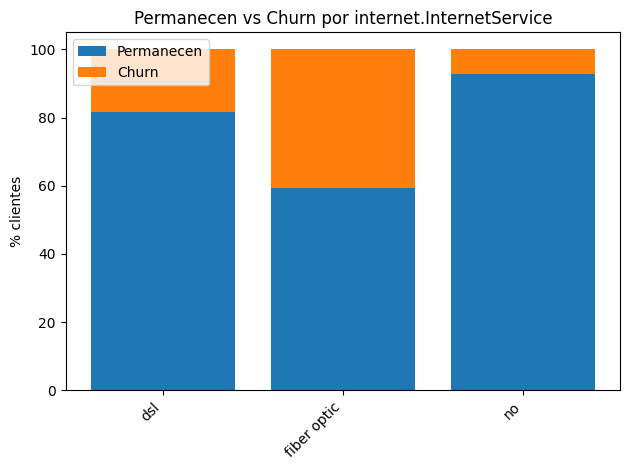

,% churn
internet.OnlineSecurity,
no,40.5
yes,14.2
no internet service,7.1


Churn_bin,Permanecen,Churn
internet.OnlineSecurity,,
no,59.5,40.5
no internet service,92.9,7.1
yes,85.8,14.2


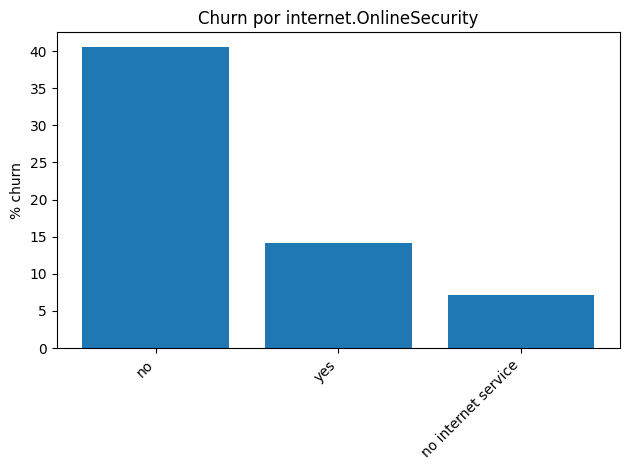

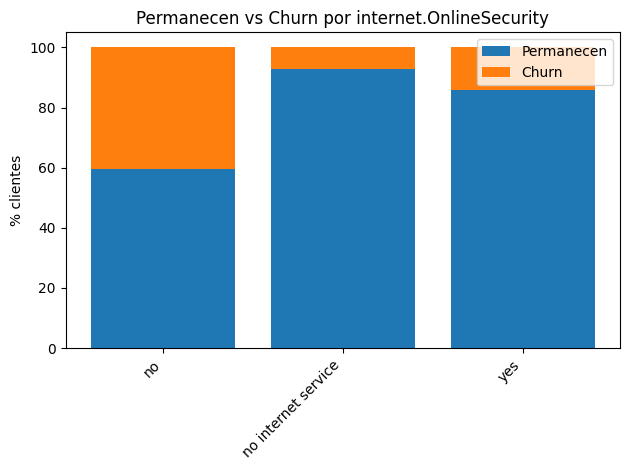

,% churn
internet.TechSupport,
no,40.4
yes,14.7
no internet service,7.1


Churn_bin,Permanecen,Churn
internet.TechSupport,,
no,59.6,40.4
no internet service,92.9,7.1
yes,85.3,14.7


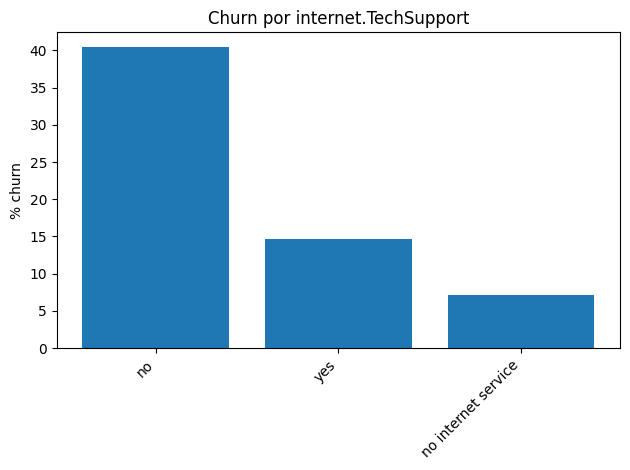

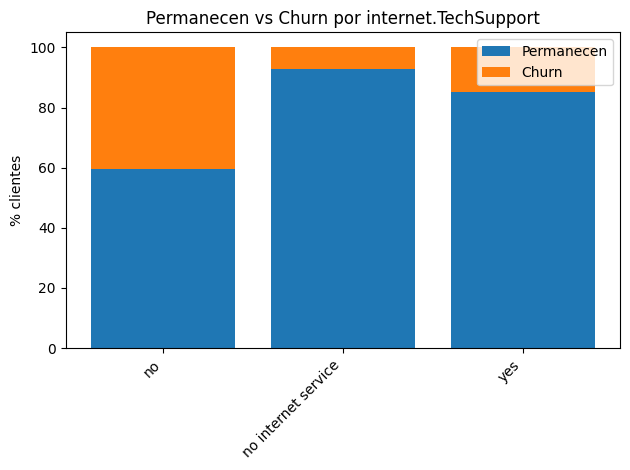


>>> customer.tenure
           count   mean  median    std  min  max
Churn_bin                                       
0           5398  37.32    37.0  24.18    0   72
1           1869  17.98    10.0  19.53    1   72


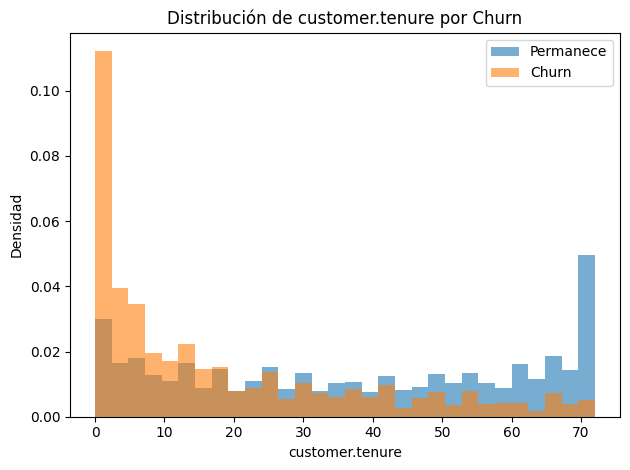

/tmp/ipython-input-1874912663.py:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=['Permanece','Churn'])


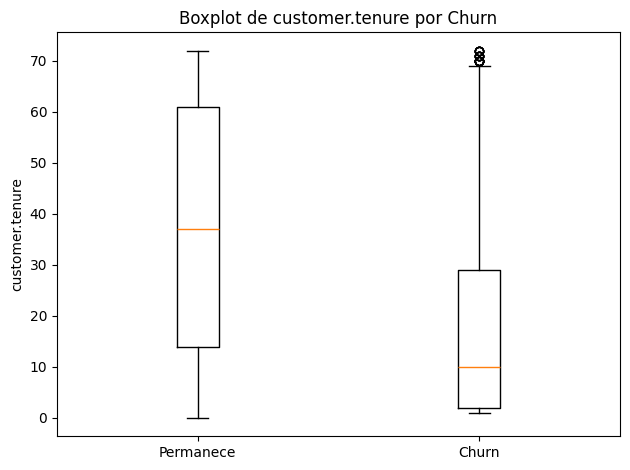


>>> account.Charges.Monthly
           count   mean  median    std    min     max
Churn_bin                                            
0           5398  61.35   64.50  31.11  18.25  118.75
1           1869  74.44   79.65  24.67  18.85  118.35


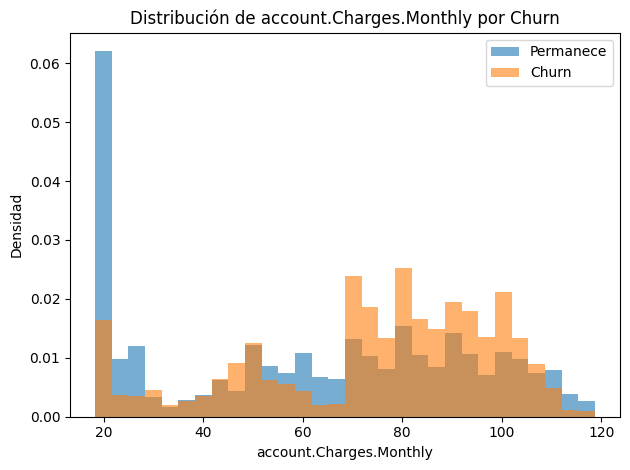

/tmp/ipython-input-1874912663.py:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=['Permanece','Churn'])


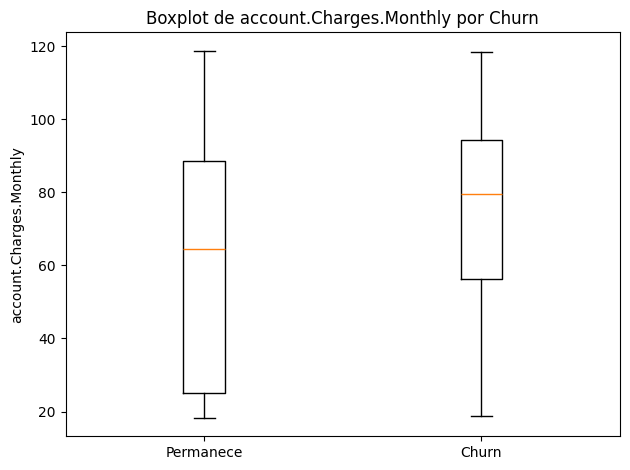


>>> account.Charges.Total
           count     mean   median      std    min      max
Churn_bin                                                  
0           5398  2535.26  1663.62  2330.80   0.00  8672.45
1           1869  1531.80   703.55  1890.82  18.85  8684.80


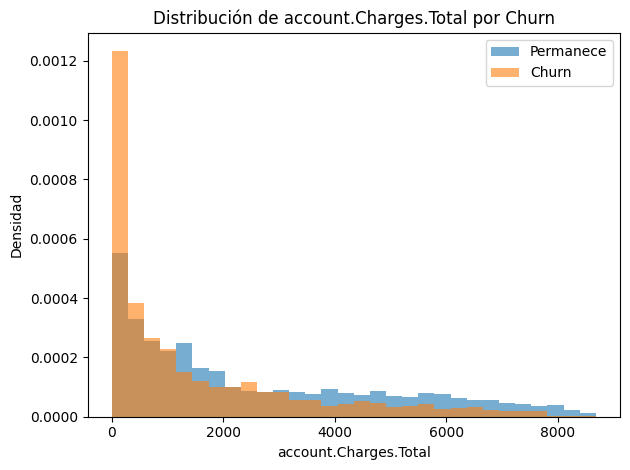

/tmp/ipython-input-1874912663.py:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=['Permanece','Churn'])


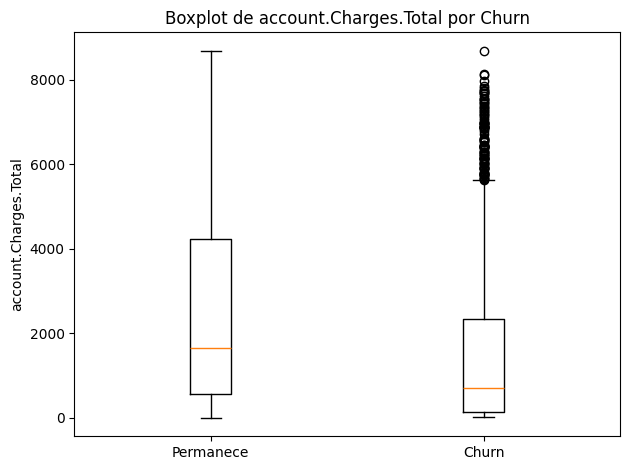


>>> Cuentas_Diarias
           count  mean  median   std   min   max
Churn_bin                                       
0           5398  2.02    2.12  1.02  0.60  3.90
1           1869  2.45    2.62  0.81  0.62  3.89


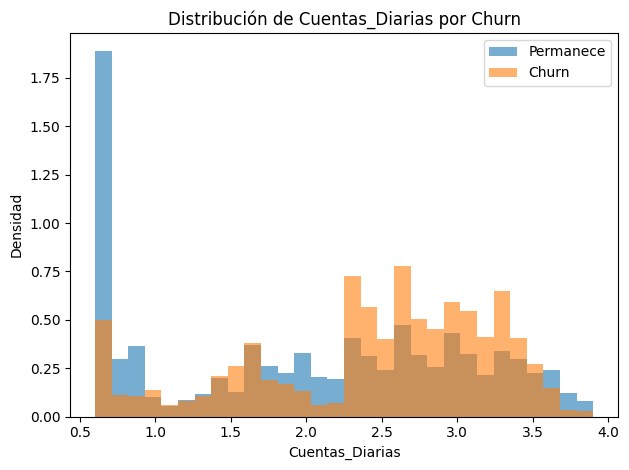

/tmp/ipython-input-1874912663.py:73: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=['Permanece','Churn'])


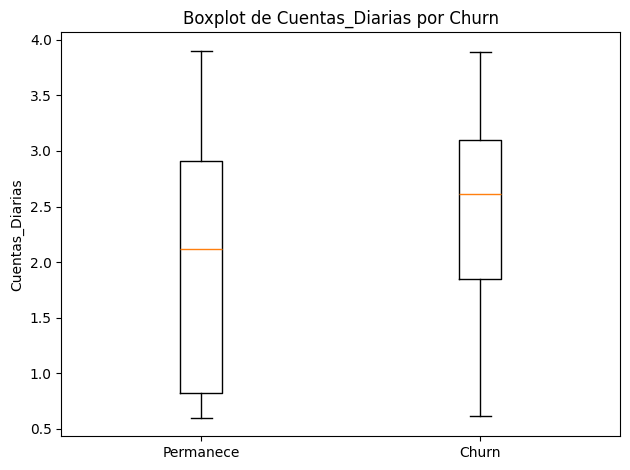


Top numéricas (|corr| con churn):
customer.tenure            0.344079
account.Charges.Total      0.193345
Cuentas_Diarias            0.189866
account.Charges.Monthly    0.189866
customer.SeniorCitizen     0.146733
dtype: float64

Top categóricas (lift de churn):
account.Contract             0.385695
internet.InternetService     0.334092
internet.OnlineSecurity      0.333460
internet.TechSupport         0.332211
internet.OnlineBackup        0.316018
internet.DeviceProtection    0.307556
account.PaymentMethod        0.290078
internet.StreamingMovies     0.255356
internet.StreamingTV         0.253802
account.PaperlessBilling     0.166090
dtype: float64


In [16]:
# ---- Media, mediana, etc... ----
num_cols = df.select_dtypes(include='number').columns
desc_global = df[num_cols].describe().T
desc_por_churn = df.groupby('Churn_bin')[num_cols].agg(['mean', 'median', 'std', 'min', 'max'])

# ---- Churn ----
counts = df['Churn_bin'].value_counts().reindex([0, 1], fill_value=0)
labels = ['Permanece', 'Churn']
print("\nResumen(conteo y %):")
print(pd.DataFrame({'Clientes': counts.values,
                    '%': (counts.values / counts.sum() * 100).round(2)}, index=labels))

plt.figure()
plt.bar(labels, counts.values)
for i, v in enumerate(counts.values):
    plt.text(i, v, f"{v} ({v / counts.sum() * 100:.1f}%)", ha='center', va='bottom')
plt.title('Distribución de Churn')
plt.ylabel('Numero de clientes')
plt.show()

# ---- Churn por variables categóricas ----
def churn_por_categoria(col):
    tasa = (df.groupby(col, observed=True)['Churn_bin'].mean()
              .mul(100).sort_values(ascending=False).round(1))
    display(tasa.rename('% churn'))
    tab = (pd.crosstab(df[col], df['Churn_bin'], normalize='index')
             .mul(100).rename(columns={0:'Permanecen', 1:'Churn'}).round(1))
    display(tab)

    plt.figure()
    plt.bar(tasa.index.astype(str), tasa.values)
    plt.ylabel('% churn'); plt.title(f'Churn por {col}')
    plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()

    plt.figure()
    plt.bar(tab.index.astype(str), tab['Permanecen'].values, label='Permanecen')
    plt.bar(tab.index.astype(str), tab['Churn'].values, bottom=tab['Permanecen'].values, label='Churn')
    plt.ylabel('% clientes'); plt.title(f'Permanecen vs Churn por {col}')
    plt.xticks(rotation=45, ha='right'); plt.legend(); plt.tight_layout(); plt.show()

cat_for_plots = [
    'account.Contract','account.PaymentMethod','account.PaperlessBilling',
    'internet.InternetService','internet.OnlineSecurity','internet.TechSupport'
]

cat_for_plots = [c for c in cat_for_plots if c in df.columns]
for c in cat_for_plots:
    churn_por_categoria(c)

# ---- Numéricas por churn (hist y boxplot) ----
num_vars = [c for c in ['customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']
            if c in df.columns]

for col in num_vars:
    x0 = df.loc[df['Churn_bin']==0, col].dropna()
    x1 = df.loc[df['Churn_bin']==1, col].dropna()

    print(f"\n>>> {col}")
    print(df.groupby('Churn_bin')[col].agg(['count','mean','median','std','min','max']).round(2))

    # Histograma
    bins = np.histogram_bin_edges(df[col].dropna(), bins=30)
    plt.figure()
    plt.hist(x0, bins=bins, alpha=0.6, density=True, label='Permanece')
    plt.hist(x1, bins=bins, alpha=0.6, density=True, label='Churn')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col); plt.ylabel('Densidad'); plt.legend()
    plt.tight_layout(); plt.show()

    # Boxplot por grupo
    plt.figure()
    plt.boxplot([x0, x1], labels=['Permanece','Churn'])
    plt.title(f'Boxplot de {col} por Churn'); plt.ylabel(col)
    plt.tight_layout(); plt.show()

# ---- Relevancia ----
num_cols_corr = df.select_dtypes(include='number').columns.difference(['Churn_bin'])
top_num = df[num_cols_corr].corrwith(df['Churn_bin']).abs().sort_values(ascending=False)

cat_candidates = df.select_dtypes(include=['string','category','object']).columns.difference(['customerID','Churn'])
top_cat = pd.Series({
    c: (lambda s: s.max()-s.min())(df.groupby(c, observed=True)['Churn_bin'].mean())
    for c in cat_candidates
}).sort_values(ascending=False)

print("\nTop numéricas (|corr| con churn):")
print(top_num.head(10))
print("\nTop categóricas (lift de churn):")
print(top_cat.head(10))

In [18]:
churn_rate = df['Churn_bin'].mean()*100
tenure_summary = df.groupby('Churn_bin')['customer.tenure'].median().to_dict()
by_contract = (df.groupby('account.Contract', observed=True)['Churn_bin']
                 .mean().mul(100).sort_values(ascending=False)).head(3)
by_payment  = (df.groupby('account.PaymentMethod', observed=True)['Churn_bin']
                 .mean().mul(100).sort_values(ascending=False)).head(3)

print("\n================  RESUMEN  ================")
print(f"Tasa global de churn: {churn_rate:.1f}%")
print(f"Mediana de tenure (0=Perm,1=Churn): {tenure_summary}")
print("Contratos con mayor % de churn:\n", by_contract.to_string())
print("Métodos de pago con mayor % de churn:\n", by_payment.to_string())
print("Pistas: foco en clientes 'month-to-month', pagos 'electronic check', y tenure bajo.\n"
      "Acciones sugeridas: onboarding y ofertas de retención en primeros meses; "
      "beneficios/seguridad en línea/soporte técnico para reducir churn en Internet.")


================  RESUMEN  ================
Tasa global de churn: 25.7%
Mediana de tenure (0=Perm,1=Churn): {0: 37.0, 1: 10.0}
Contratos con mayor % de churn:
 account.Contract
month-to-month    41.323346
one year          10.928242
two year           2.753873
Métodos de pago con mayor % de churn:
 account.PaymentMethod
electronic check             43.803681
mailed check                 18.498498
bank transfer (automatic)    16.236627
Pistas: foco en clientes 'month-to-month', pagos 'electronic check', y tenure bajo.
Acciones sugeridas: onboarding y ofertas de retención en primeros meses; beneficios/seguridad en línea/soporte técnico para reducir churn en Internet.


In [23]:
# Conversion a numericos

for col in ['customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # convierte '', ' ', etc. en NaN

num_corr = {}
for c in ['customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']:
    if c in df.columns:
        num_corr[c] = df[c].corr(df['Churn_bin'])

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

if 'Churn_bin' not in df.columns:
    df['Churn_bin'] = df['Churn'].astype(str).str.strip().str.lower().eq('yes').astype(int)

if 'Cuentas_Diarias' not in df.columns and 'account.Charges.Monthly' in df.columns:
    days_per_month = 365.25/12
    df['Cuentas_Diarias'] = df['account.Charges.Monthly'].fillna(0) / days_per_month

# -- Métricas síntesis para el informe --
churn_rate = df['Churn_bin'].mean()*100

tenure_median_0 = df.loc[df['Churn_bin']==0, 'customer.tenure'].median() if 'customer.tenure' in df else np.nan
tenure_median_1 = df.loc[df['Churn_bin']==1, 'customer.tenure'].median() if 'customer.tenure' in df else np.nan

m_monthly_0 = df.loc[df['Churn_bin']==0, 'account.Charges.Monthly'].mean() if 'account.Charges.Monthly' in df else np.nan
m_monthly_1 = df.loc[df['Churn_bin']==1, 'account.Charges.Monthly'].mean() if 'account.Charges.Monthly' in df else np.nan

def tasa_por(col):
    if col in df:
        return (df.groupby(col, observed=True)['Churn_bin'].mean().mul(100).sort_values(ascending=False))
    return pd.Series(dtype=float)

by_contract  = tasa_por('account.Contract').head(3)
by_payment   = tasa_por('account.PaymentMethod').head(3)
by_security  = tasa_por('internet.OnlineSecurity')

num_corr = {}
for c in ['customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']:
    if c in df:
        num_corr[c] = df[c].corr(df['Churn_bin'])

#📄Informe final

El objetivo del analisis en cuestion es entender las razones tras la cancelacion de los clientes de la empresa Telecom X como parte del proyecto Chrun de Clientes.
Esto con el fin de apoyar en la toma de decisiones a partir de los datos obtenidos y mejorar la retencion de clientes.

Los pasos seguidos en el analisis son los siguientes:

1. Extraccion: Se lee el JSON proveido con la informacion en cuestion y se aplana por medio de la funcion normalize de pandas.
2. Limpieza y tratamiento:
- Se consideran los tipos de datos a manera que algunos cambian a texto para su procesamiento y otros a numericos.
- Se asignan valores a Total en base a Tenure.
- Se asigna variable objetivo Churn.
- Se obtiene valores diarios y se clasifican por categoria algunas variables.

## 🔹 Análisis Exploratorio de Datos

**Distribución global de churn** (conteo y porcentaje):

,Clientes,%
Permanecen,5398,74.28
Churn,1869,25.72


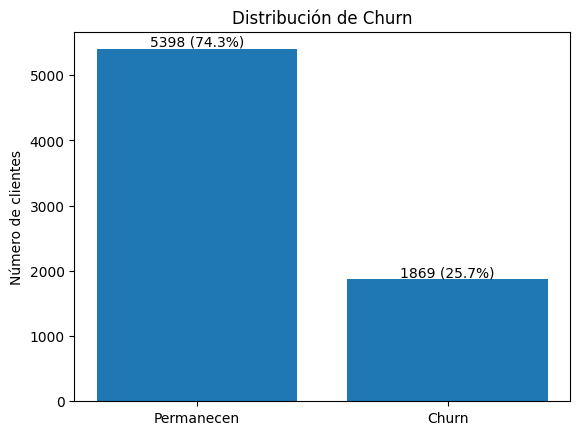

**Churn por `account.Contract`**

,% churn
account.Contract,
month-to-month,41.3
one year,10.9
two year,2.8


Composición (% clientes que permanecen vs churn):

Churn_bin,Permanecen,Churn
account.Contract,,
month-to-month,58.7,41.3
one year,89.1,10.9
two year,97.2,2.8


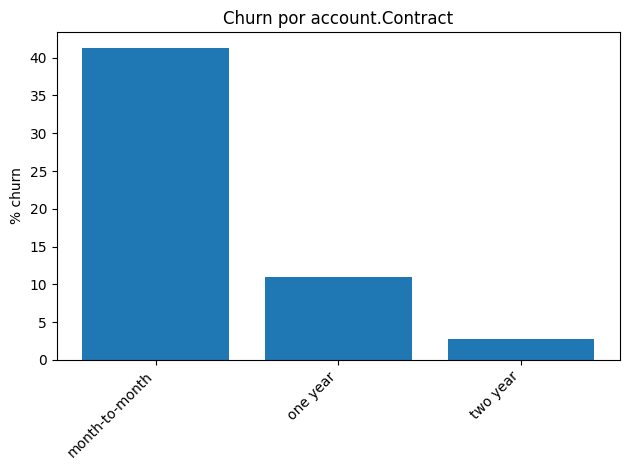

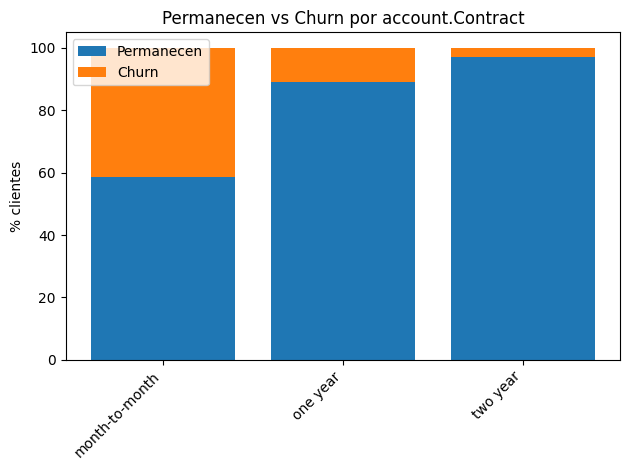

**Churn por `account.PaymentMethod`**

,% churn
account.PaymentMethod,
electronic check,43.8
mailed check,18.5
bank transfer (automatic),16.2
credit card (automatic),14.8


Composición (% clientes que permanecen vs churn):

Churn_bin,Permanecen,Churn
account.PaymentMethod,,
bank transfer (automatic),83.8,16.2
credit card (automatic),85.2,14.8
electronic check,56.2,43.8
mailed check,81.5,18.5


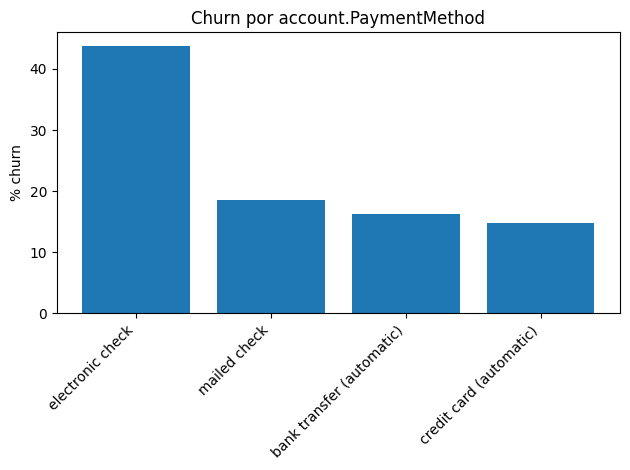

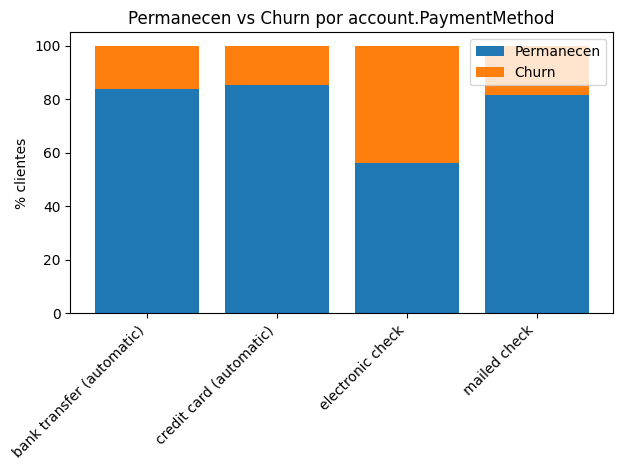

**Churn por `internet.OnlineSecurity`**

,% churn
internet.OnlineSecurity,
no,40.5
yes,14.2
no internet service,7.1


Composición (% clientes que permanecen vs churn):

Churn_bin,Permanecen,Churn
internet.OnlineSecurity,,
no,59.5,40.5
no internet service,92.9,7.1
yes,85.8,14.2


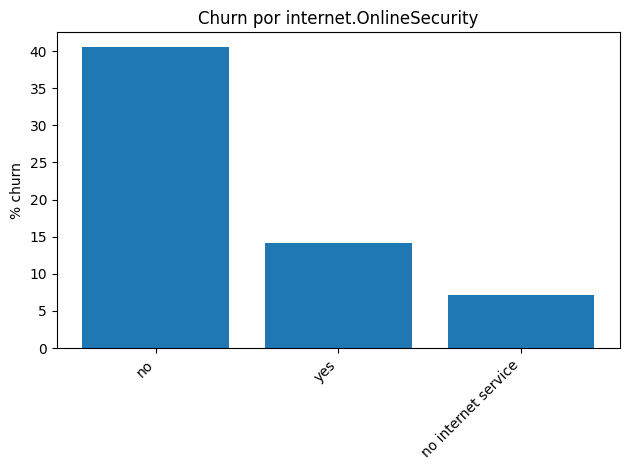

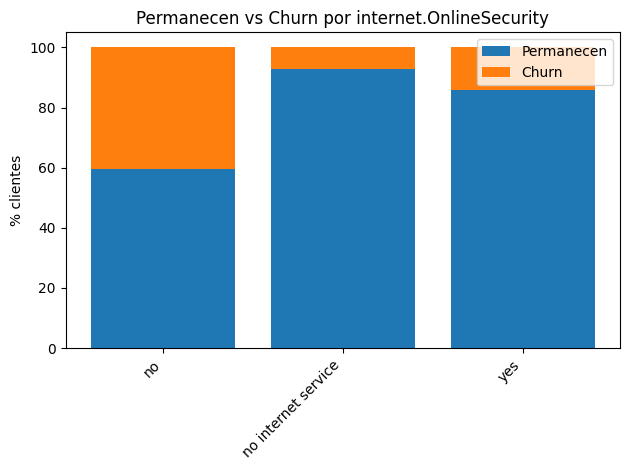

**Churn por `internet.TechSupport`**

,% churn
internet.TechSupport,
no,40.4
yes,14.7
no internet service,7.1


Composición (% clientes que permanecen vs churn):

Churn_bin,Permanecen,Churn
internet.TechSupport,,
no,59.6,40.4
no internet service,92.9,7.1
yes,85.3,14.7


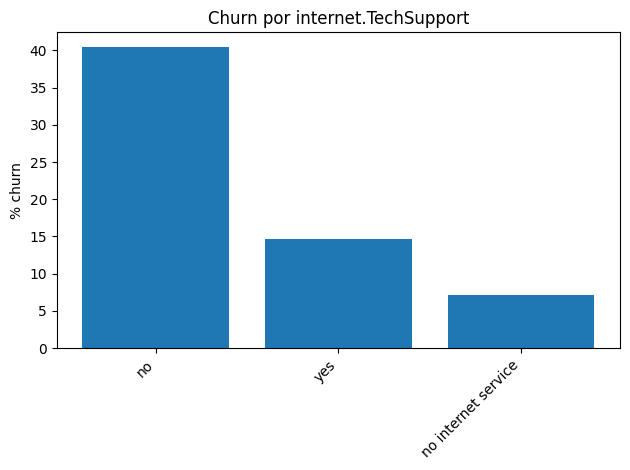

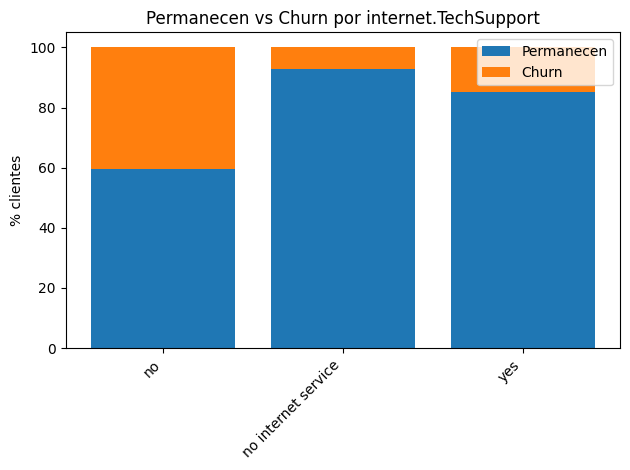

**Distribución de `customer.tenure` por churn**

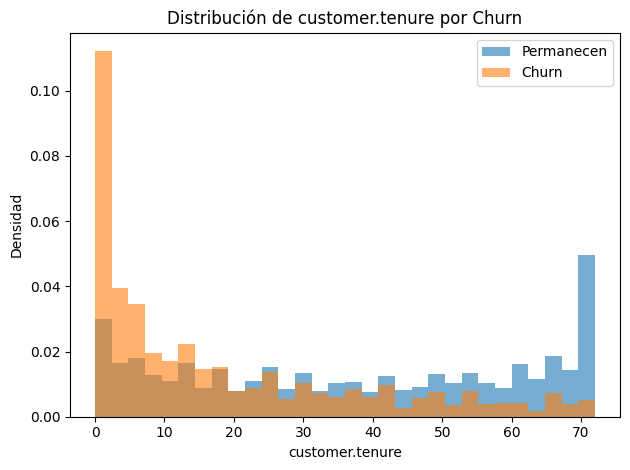

/tmp/ipython-input-4278723301.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=['Permanecen','Churn'])


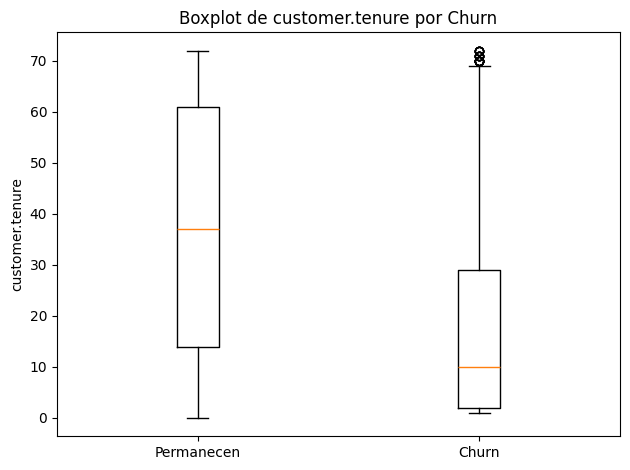

**Distribución de `account.Charges.Monthly` por churn**

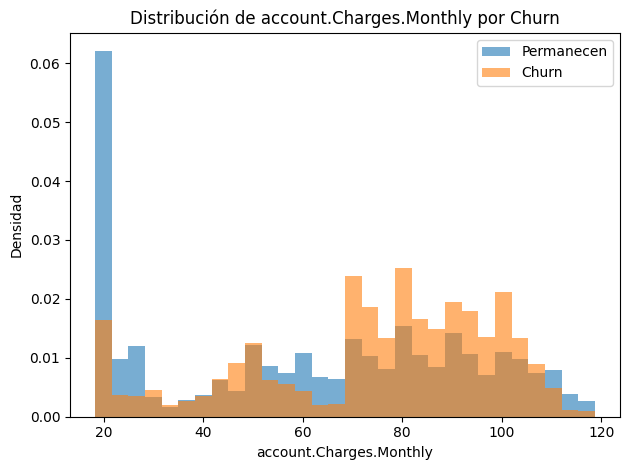

/tmp/ipython-input-4278723301.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=['Permanecen','Churn'])


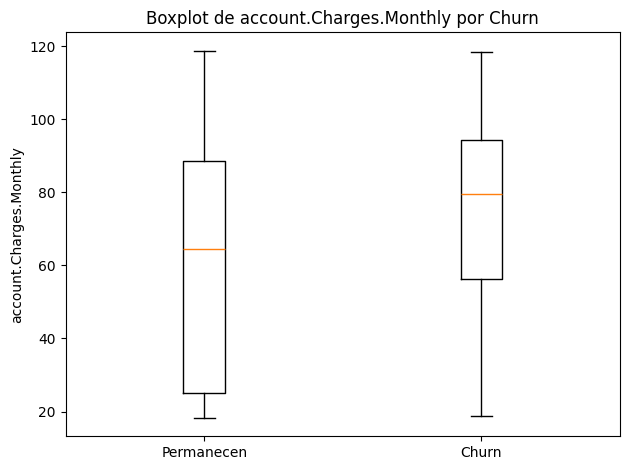

**Distribución de `account.Charges.Total` por churn**

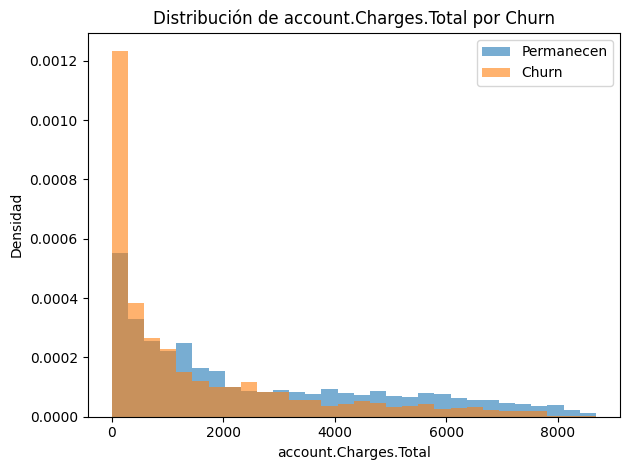

/tmp/ipython-input-4278723301.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=['Permanecen','Churn'])


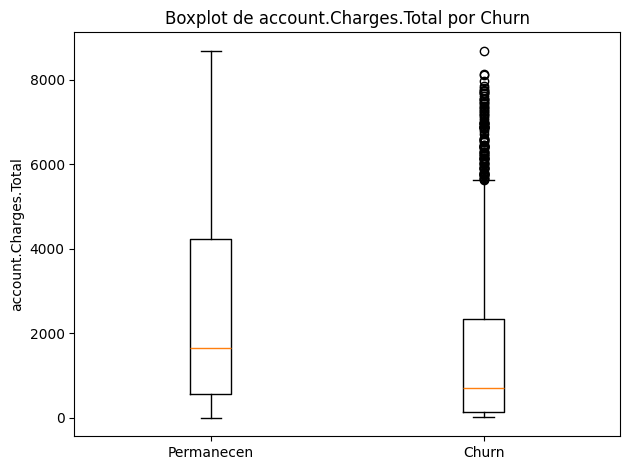

**Distribución de `Cuentas_Diarias` por churn**

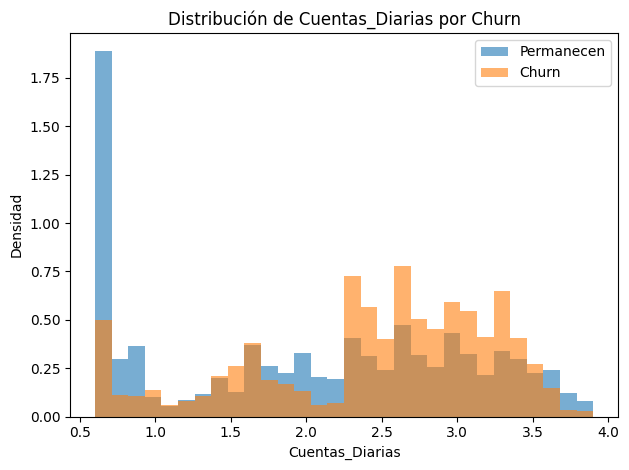

/tmp/ipython-input-4278723301.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x0, x1], labels=['Permanecen','Churn'])


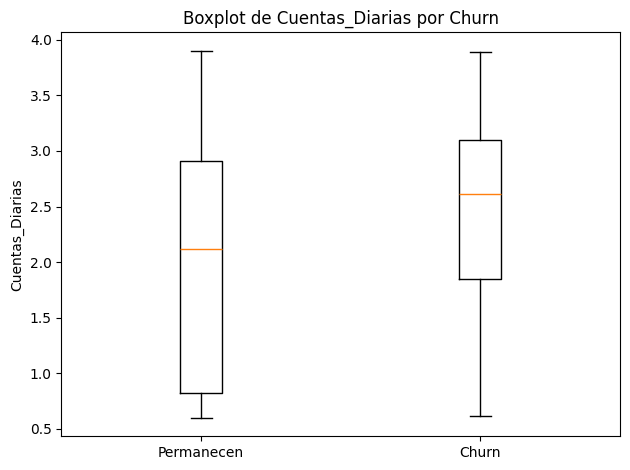

In [24]:
counts = df['Churn_bin'].value_counts().reindex([0, 1], fill_value=0)
labels = ['Permanecen', 'Churn']
summary = pd.DataFrame({'Clientes': counts.values,
                        '%': (counts.values / counts.sum() * 100).round(2)}, index=labels)

display(Markdown("## 🔹 Análisis Exploratorio de Datos"))
display(Markdown("**Distribución global de churn** (conteo y porcentaje):"))
display(summary)

plt.figure()
plt.bar(labels, counts.values)
for i, v in enumerate(counts.values):
    plt.text(i, v, f"{v} ({v / counts.sum() * 100:.1f}%)", ha='center', va='bottom')
plt.title('Distribución de Churn')
plt.ylabel('Número de clientes')
plt.show()

# ---- Churn por variables categóricas clave ----
def graf_cat(col):
    if col not in df:
        return
    display(Markdown(f"**Churn por `{col}`**"))
    tasa = (df.groupby(col, observed=True)['Churn_bin'].mean()
              .mul(100).sort_values(ascending=False).round(1))
    display(tasa.rename('% churn'))

    tab = (pd.crosstab(df[col], df['Churn_bin'], normalize='index')
             .mul(100).rename(columns={0:'Permanecen',1:'Churn'}).round(1))
    display(Markdown("Composición (% clientes que permanecen vs churn):"))
    display(tab)

    plt.figure()
    plt.bar(tasa.index.astype(str), tasa.values)
    plt.ylabel('% churn'); plt.title(f'Churn por {col}')
    plt.xticks(rotation=45, ha='right'); plt.tight_layout(); plt.show()

    plt.figure()
    plt.bar(tab.index.astype(str), tab['Permanecen'].values, label='Permanecen')
    plt.bar(tab.index.astype(str), tab['Churn'].values, bottom=tab['Permanecen'].values, label='Churn')
    plt.ylabel('% clientes'); plt.title(f'Permanecen vs Churn por {col}')
    plt.xticks(rotation=45, ha='right'); plt.legend(); plt.tight_layout(); plt.show()

for c in ['account.Contract','account.PaymentMethod','internet.OnlineSecurity','internet.TechSupport']:
    graf_cat(c)

# ---- Numéricas por churn----
def graf_num(col):
    if col not in df:
        return
    x0 = df.loc[df['Churn_bin']==0, col].dropna()
    x1 = df.loc[df['Churn_bin']==1, col].dropna()

    display(Markdown(f"**Distribución de `{col}` por churn**"))
    bins = np.histogram_bin_edges(df[col].dropna(), bins=30)
    plt.figure()
    plt.hist(x0, bins=bins, alpha=0.6, density=True, label='Permanecen')
    plt.hist(x1, bins=bins, alpha=0.6, density=True, label='Churn')
    plt.xlabel(col); plt.ylabel('Densidad'); plt.title(f'Distribución de {col} por Churn'); plt.legend()
    plt.tight_layout(); plt.show()

    plt.figure()
    plt.boxplot([x0, x1], labels=['Permanecen','Churn'])
    plt.ylabel(col); plt.title(f'Boxplot de {col} por Churn')
    plt.tight_layout(); plt.show()

for c in ['customer.tenure','account.Charges.Monthly','account.Charges.Total','Cuentas_Diarias']:
    graf_num(c)


In [35]:
def fmt_top(s):
    if s is None or s.empty: return "s/d"
    return ", ".join([f"{k} ({v:.1f}%)" for k, v in s.items()])

corr_tenure  = num_corr.get('customer.tenure', np.nan)
corr_monthly = num_corr.get('account.Charges.Monthly', np.nan)
corr_total   = num_corr.get('account.Charges.Total', np.nan)

md_conclusions = f"""
## Conclusiones

- **Tasa global de churn: {churn_rate:.1f}%**.
Este análisis muestra que los clientes que se van de la compañía tienden a tener una antigüedad (tenure) menor. La antigüedad media de los clientes que se fueron es de {tenure_median_1:.0f} meses, mientras que la de los clientes que se quedaron es de {tenure_median_0:.0f} meses. Esto confirma una correlación negativa con el churn, lo que significa que a mayor antigüedad, menor es la probabilidad de abandono.

Además de la antigüedad, otros factores clave se asocian con una mayor tasa de abandono:

Cargos mensuales: Los clientes que se dan de baja pagan un promedio de ${m_monthly_1:.2f}, una cifra mayor que el promedio de ${m_monthly_0:.2f} de los clientes que permanecen. La correlación positiva de {corr_monthly:.2f} indica que a mayor cargo mensual, mayor es la probabilidad de abandono.

Contrato: Los clientes con contratos de mes a mes tienen la mayor tasa de abandono, lo que los convierte en un grupo de alto riesgo.

Método de pago: El cheque electrónico es el método de pago más común entre los clientes que se dan de baja.

Servicios adicionales: Los clientes que no tienen servicios de seguridad en línea como {fmt_top(by_security)}, presentan un mayor porcentaje de churn.

En resumen, los clientes con mayor riesgo de abandono son aquellos que son recién incorporados, tienen contratos mensuales, pagan con cheque electrónico y no cuentan con seguridad en línea o soporte técnico. También se observa una tendencia a que el churn aumente en clientes con cargos mensuales más altos.


##Basándonos en el análisis, aquí hay algunas sugerencias clave para abordar los factores que impulsan el abandono de clientes:

1. Enfocarse en la retención de clientes nuevos
Dado que los clientes recién incorporados tienen una alta tasa de abandono, es crucial mejorar su experiencia inicial.

2. Ofrecer incentivos para cambiar de contrato
Los contratos de mes a mes son un punto de alta fuga.

3. Diversificar los métodos de pago
El cheque electrónico se asocia con un alto churn, lo que sugiere que los clientes que lo usan podrían percibir una fricción en el proceso de pago.

4. Fortalecer los servicios de seguridad y soporte
La ausencia de servicios como seguridad en línea y soporte técnico está directamente ligada a un mayor churn.
"""
display(Markdown(md_conclusions))



## Conclusiones

- **Tasa global de churn: 25.7%**.
Este análisis muestra que los clientes que se van de la compañía tienden a tener una antigüedad (tenure) menor. La antigüedad media de los clientes que se fueron es de 10 meses, mientras que la de los clientes que se quedaron es de 37 meses. Esto confirma una correlación negativa con el churn, lo que significa que a mayor antigüedad, menor es la probabilidad de abandono.

Además de la antigüedad, otros factores clave se asocian con una mayor tasa de abandono:

Cargos mensuales: Los clientes que se dan de baja pagan un promedio de $74.44, una cifra mayor que el promedio de $61.35 de los clientes que permanecen. La correlación positiva de 0.19 indica que a mayor cargo mensual, mayor es la probabilidad de abandono.

Contrato: Los clientes con contratos de mes a mes tienen la mayor tasa de abandono, lo que los convierte en un grupo de alto riesgo.

Método de pago: El cheque electrónico es el método de pago más común entre los clientes que se dan de baja.

Servicios adicionales: Los clientes que no tienen servicios de seguridad en línea como no (40.5%), yes (14.2%), no internet service (7.1%), presentan un mayor porcentaje de churn.

En resumen, los clientes con mayor riesgo de abandono son aquellos que son recién incorporados, tienen contratos mensuales, pagan con cheque electrónico y no cuentan con seguridad en línea o soporte técnico. También se observa una tendencia a que el churn aumente en clientes con cargos mensuales más altos. 


##Basándonos en el análisis, aquí hay algunas sugerencias clave para abordar los factores que impulsan el abandono de clientes:

1. Enfocarse en la retención de clientes nuevos
Dado que los clientes recién incorporados tienen una alta tasa de abandono, es crucial mejorar su experiencia inicial.

2. Ofrecer incentivos para cambiar de contrato
Los contratos de mes a mes son un punto de alta fuga.

3. Diversificar los métodos de pago
El cheque electrónico se asocia con un alto churn, lo que sugiere que los clientes que lo usan podrían percibir una fricción en el proceso de pago.

4. Fortalecer los servicios de seguridad y soporte
La ausencia de servicios como seguridad en línea y soporte técnico está directamente ligada a un mayor churn.
